## Testing Cahn-Hilliard

In [1]:
import voxelsss as vox
import numpy as np
import time
import matplotlib.pyplot as plt

Initialize field with random noise

In [2]:
nx, ny, nz = [100, 100, 100]

sim = vox.VoxelFields(nx, ny, nz, (1,1,1))
noise = 0.5 + 0.1*np.random.rand(nx, ny, nz)

In [3]:
%matplotlib inline

phases = ['c0', 'c1', 'c2', 'c3']
# phases = ['c0', 'c1', 'c2']

noise0 = 0.3 + 0.1*np.random.rand(nx, ny, nz)
noise1 = 0.3 + 0.1*np.random.rand(nx, ny, nz)
noise2 = 0.1 + 0.05*np.random.rand(nx, ny, nz)
sim.add_field('c0', noise0)
sim.add_field('c1', noise1)
sim.add_field('c2', noise2)
sim.add_field('c3', 1-noise0-noise1-noise2)

# binary_interactions = 3.5*np.ones((4,4))
binary_interactions = np.zeros((4,4))
binary_interactions[0,1] = 3.5
binary_interactions[1,0] = 3.5
ternary_interactions = np.zeros((4,4,4))
i, j, k = np.meshgrid(np.arange(4), np.arange(4), np.arange(4), indexing='ij')
condition = (i != j) & (i != k) & (j != k)
ternary_interactions[condition] = 0

dt = 0.1
iter = int(1000/dt)
a = vox.CahnHilliard4PhaseSolver(sim, phases, binary_interactions, ternary_interactions, kappa=3, device='cuda')
a.solve_FFT(time_increment=dt, max_iters=iter, frames=20, verbose='plot', vtk_out=False)

AttributeError: module 'voxelsss' has no attribute 'CahnHilliard4PhaseSolver'

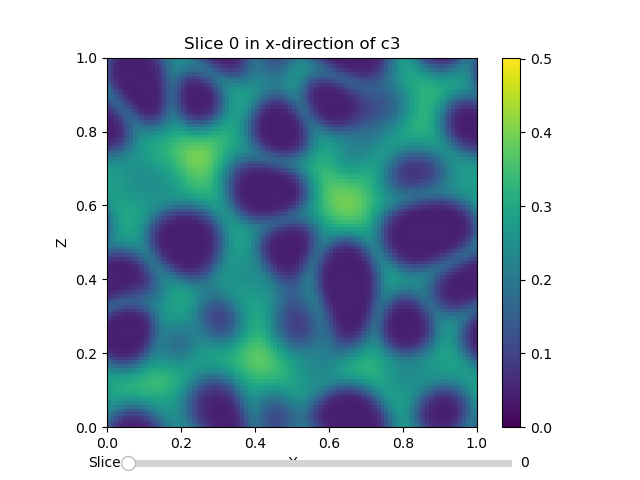

In [22]:
%matplotlib widget
sim.plot_field_interactive('c3')

In [39]:
import torch

ternary = torch.zeros((4,4,4))
for i in range (4):
    for j in range(4):
        for k in range(4):
            if (i!=j) and (i!=k) and (j!=k):
                ternary[i,j,k] = 2

# torch.diagonal(torch.roll(ternary,0,dims=0))
torch.roll(ternary,shifts=(5,6),dims=(0,1)).diagonal().diagonal()

tensor([2., 2., 2., 2.])

In [43]:
test = c*torch.diagonal(torch.roll(binary,1,dims=0)).view(-1, 1, 1, 1)
test[3]

tensor([[[6., 6., 6., 6., 6., 6., 6., 6., 6., 6.],
         [6., 6., 6., 6., 6., 6., 6., 6., 6., 6.],
         [6., 6., 6., 6., 6., 6., 6., 6., 6., 6.],
         [6., 6., 6., 6., 6., 6., 6., 6., 6., 6.],
         [6., 6., 6., 6., 6., 6., 6., 6., 6., 6.],
         [6., 6., 6., 6., 6., 6., 6., 6., 6., 6.],
         [6., 6., 6., 6., 6., 6., 6., 6., 6., 6.],
         [6., 6., 6., 6., 6., 6., 6., 6., 6., 6.],
         [6., 6., 6., 6., 6., 6., 6., 6., 6., 6.],
         [6., 6., 6., 6., 6., 6., 6., 6., 6., 6.]],

        [[6., 6., 6., 6., 6., 6., 6., 6., 6., 6.],
         [6., 6., 6., 6., 6., 6., 6., 6., 6., 6.],
         [6., 6., 6., 6., 6., 6., 6., 6., 6., 6.],
         [6., 6., 6., 6., 6., 6., 6., 6., 6., 6.],
         [6., 6., 6., 6., 6., 6., 6., 6., 6., 6.],
         [6., 6., 6., 6., 6., 6., 6., 6., 6., 6.],
         [6., 6., 6., 6., 6., 6., 6., 6., 6., 6.],
         [6., 6., 6., 6., 6., 6., 6., 6., 6., 6.],
         [6., 6., 6., 6., 6., 6., 6., 6., 6., 6.],
         [6., 6., 6., 6., 6.,

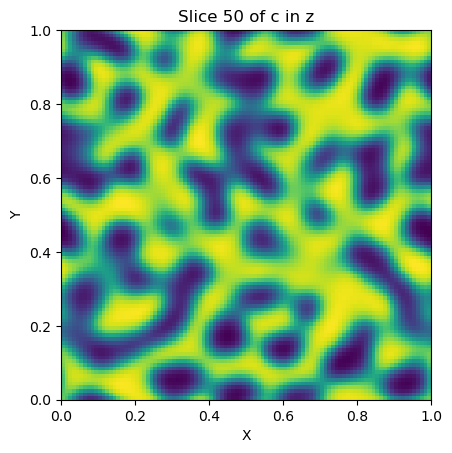

Wall time: 23.2195 s (0.0012 s/iter)
GPU-RAM currently allocated 38.19 MB (41.94 MB reserved)
GPU-RAM maximally allocated 38.19 MB (41.94 MB reserved)


In [4]:
%matplotlib inline
dt = 0.005 # 0.002 0.005
iter = int(100/dt)
sim.add_field("c", noise)
a = vox.CahnHilliardSolver(sim, "c", device='cuda')
# a.solve(variable_m = False, time_increment=dt, max_iters=iter, frames=10, verbose='plot', vtk_out=False)
a.solve(variable_m = True, time_increment=dt, max_iters=iter, frames=10, verbose='plot', vtk_out=False)
reference = sim.fields["c"]


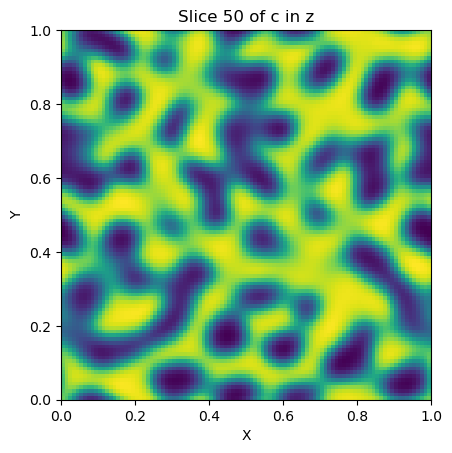

Wall time: 3.5527 s (0.0036 s/iter)
GPU-RAM currently allocated 83.89 MB (106.95 MB reserved)
GPU-RAM maximally allocated 83.89 MB (106.95 MB reserved)


In [5]:
%matplotlib inline
dt = 0.1
iter = int(100/dt)
sim.add_field("c", noise)
a = vox.CahnHilliardSolver(sim, "c", device='cuda')
# a.solve_FFT(variable_m=False, time_increment=dt, max_iters=iter, frames=20, verbose='plot', vtk_out=False)
a.solve_FFT(variable_m=True, time_increment=dt, max_iters=iter, frames=30, verbose='plot', vtk_out=False)

In [5]:
# %matplotlib widget
# sim.plot_field_interactive("c")

0.13603324


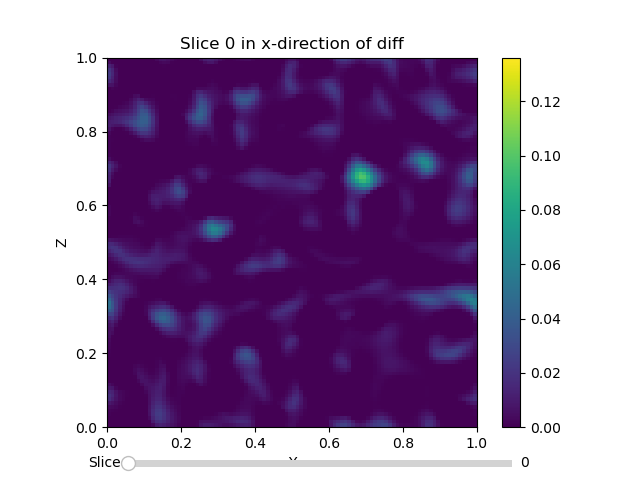

In [6]:
%matplotlib widget
difference = sim.fields["c"]-reference
sim.add_field("diff", difference)
sim.plot_field_interactive("diff")
print(np.max(np.abs(difference)))

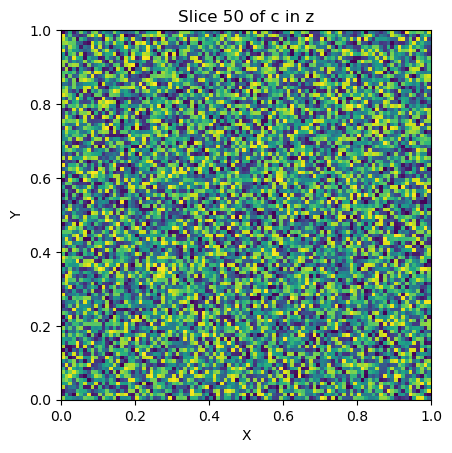

RuntimeError: "arange_cuda" not implemented for 'ComplexFloat'

In [3]:
dt = 0.1
iter = int(100/dt)
sim.add_field("c", noise)
a = vox.CahnHilliardSolver(sim, "c", device='cuda')
a.solve_FFT_neumann(time_increment=dt, max_iters=iter, frames=30, verbose='plot', vtk_out=False)

In [10]:
i = 3
phases = ['c0', 'c1', 'c2', 'c3']
for idx in range(i+1,i+4):
    j = idx % 4
    print(f'b{i}.{j}')
    for k in range(j+1,4):
        if k != i:
            print(f'b{i}.{j}.{k}')
    # tensor = torch.tensor(sim.fields[name], dtype=self.precision, device=self.device)
    # setattr(self, f'c{i}', tensor)

b3.0
b3.0.1
b3.0.2
b3.1
b3.1.2
b3.2


In [9]:
phases = ['c0', 'c1', 'c2']
phases[-1]

'c2'

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Parameters
L = 10.0           # Length of the 1D system in micrometers
N = 100            # Number of grid points
dx = L / N   # Spatial step size
dt = 0.001         # Time step
D = 1e-12          # Diffusion coefficient (in micrometer^2/s)
total_time = 2.0   # Total simulation time (in seconds)

# Create grid for space and time
x = torch.linspace(0, L, N, dtype=torch.float32)  # Position grid
t_steps = int(total_time / dt)  # Number of time steps

# Initial concentration profile: Let's assume initial uniform concentration
C = 1e3 * torch.ones(N, dtype=torch.float32)  # Initial concentration (in mol/m^3)
d2C = torch.zeros_like(C)

# Function for diffusion step
def step(C, D, dx, dt):
    # Calculate the second derivative of C using finite differences
    
    
    # Interior points (2nd derivative using finite difference)
    d2C[1:-1] = (C[2:] - 2*C[1:-1] + C[:-2]) / (dx**2)
    
    # Diffusion step: Apply Fick's law
    C_new = C + D * d2C * dt
    return C_new

# Time loop: Simulate for `t_steps` time steps
for t in range(t_steps):
    C = step(C, D, dx, dt)
    
    # Boundary conditions stay fixed (no change at the edges)
    C[0] = 1e3  # Left boundary (Li metal)
    C[-1] = 0.0  # Right boundary (Aluminum)

    # Optionally plot the concentration profile at every 100 steps
    if t % 100 == 0:
        plt.plot(x.numpy(), C.numpy(), label=f'Time = {t*dt:.2f}s')

# Plot the final concentration profile
plt.xlabel('Position (µm)')
plt.ylabel('Concentration (mol/m³)')
plt.title('Li⁺ Ion Concentration Profile')
plt.legend()
plt.show()


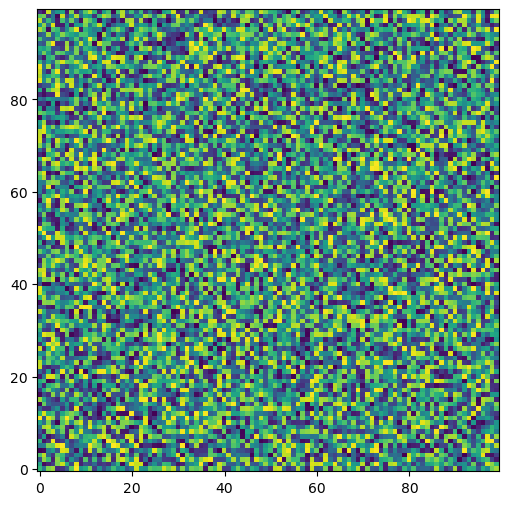

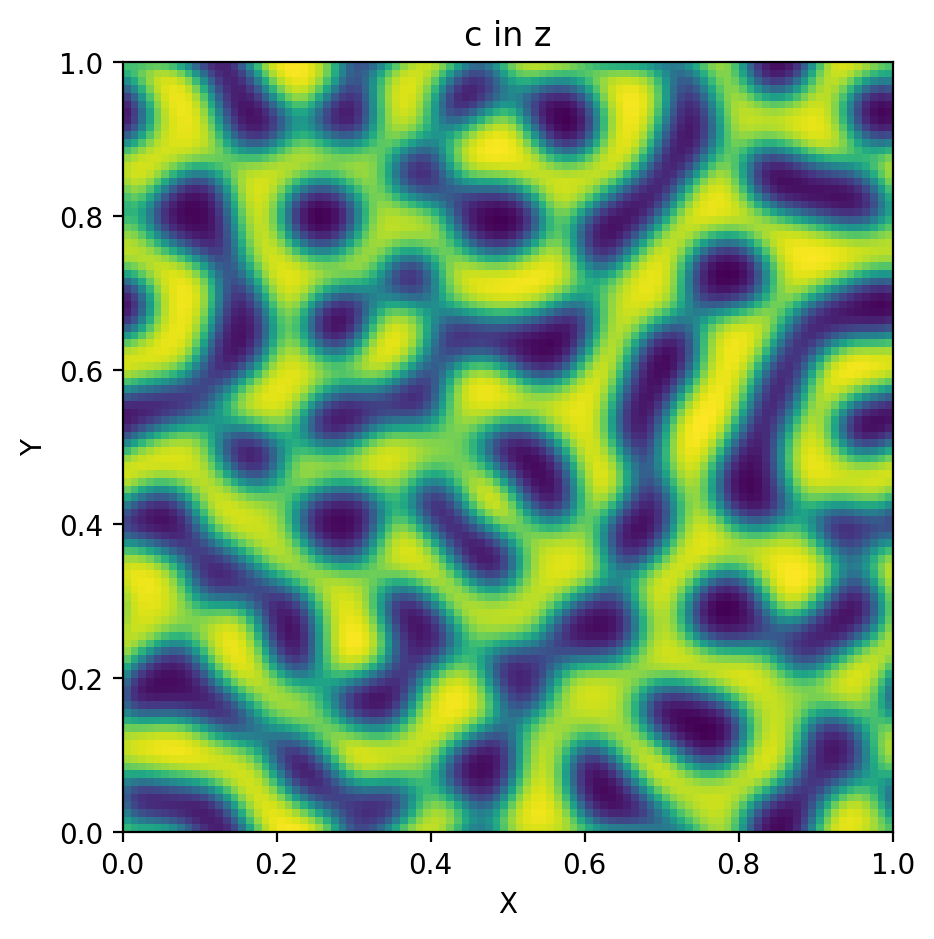

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(noise[:,:,0], origin='lower', cmap='viridis')
sim.plot_slice("c",0)

IntSlider(value=0, description='Slice:', max=1)

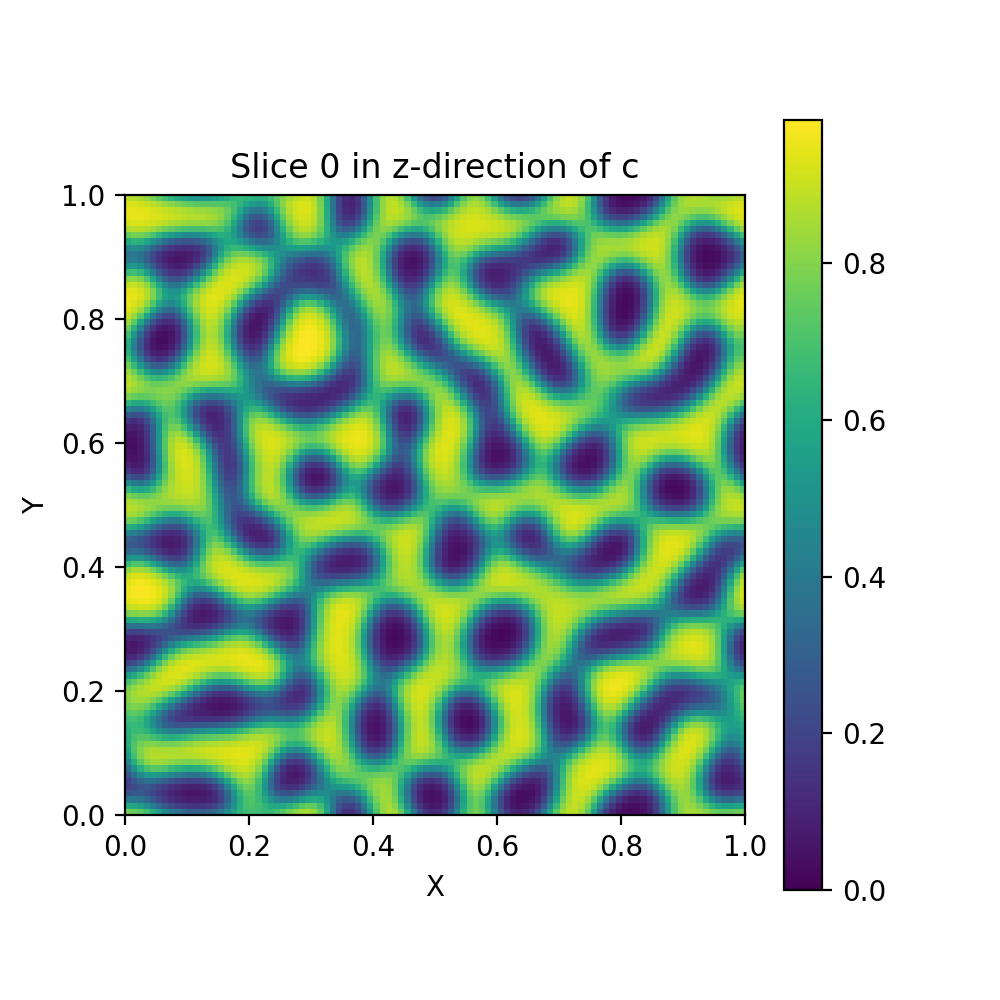

In [13]:
%matplotlib widget
sim.plot_field_interactive("c", direction='z')